# Explore here

In [3]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import os

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


# Step 1: Loading the Dataset

In [6]:
# Step 1: Loading the dataset
print("Step 1: Loading the dataset...")

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
print("Dataset loaded successfully.")
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
df.info()


Step 1: Loading the dataset...
Dataset loaded successfully.
First 5 rows:
                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [8]:

if not df.empty:
    print("\n--- DEBUG INFO ---")
    print("DataFrame Columns:", df.columns.tolist())
    print("DataFrame Head:\n", df.head())
    print("------------------")
# --- END DEBUG PRINTS ---


--- DEBUG INFO ---
DataFrame Columns: ['date', 'sales']
DataFrame Head:
                          date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633
------------------


# Step 2: Construct and Analyze the Time Series


Step 2: Constructing and analyzing the time series...

Checking for missing values:
sales    0
dtype: int64

Checking for duplicates:
0


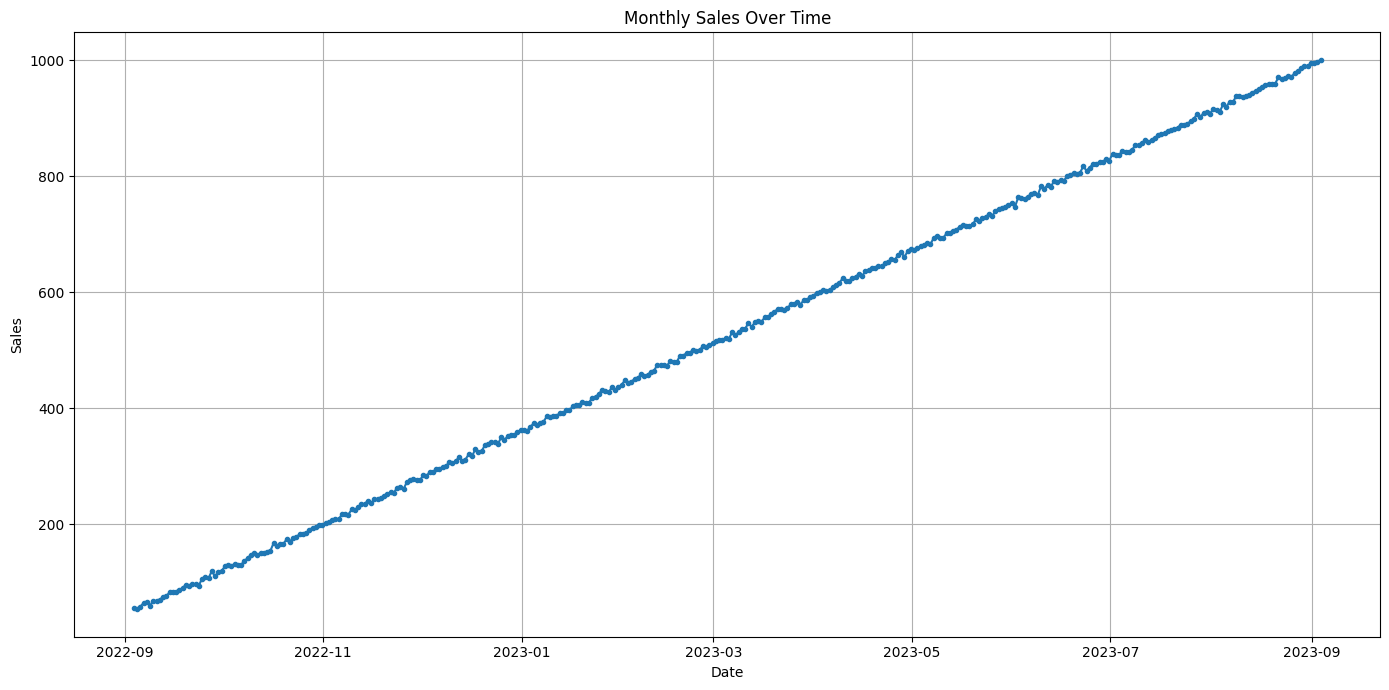


Analysis:
The most common time difference between consecutive data points is: 1 days 00:00:00
Based on the time differences, the tensor of the time series appears to be: 1 days 00:00:00
Trend: Visually, the sales appear to be generally increasing over time, indicating an **upward trend**.


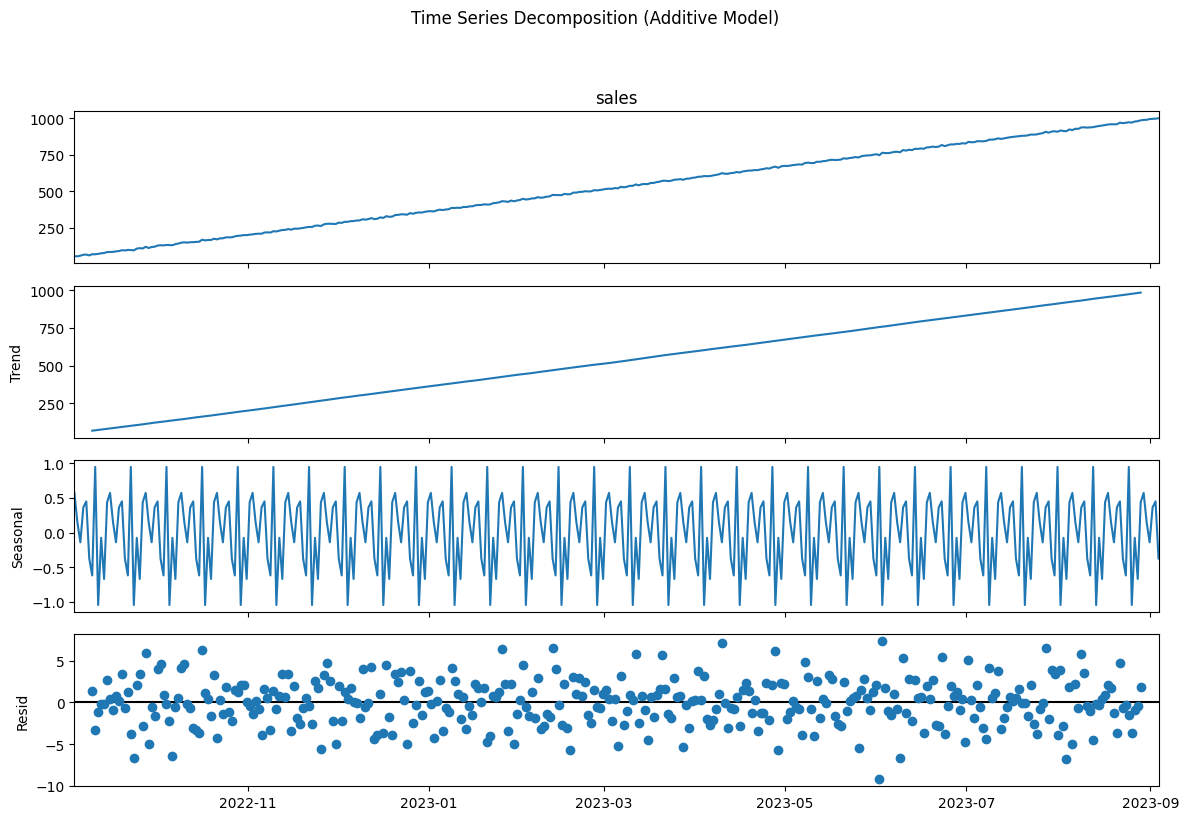

The decomposition plot confirms a clear upward trend component.

Stationarity Check:
ADF Statistic: 0.55
p-value: 0.99
Critical Values:
	1%: -3.45
	5%: -2.87
	10%: -2.57
Conclusion: The p-value is > 0.05, so we **fail to reject the null hypothesis**. The time series is **NOT stationary**.
This non-stationarity is expected given the visible upward trend.

Variability/Noise:
From the initial plot and the decomposition plot's 'Residuals' component, there is clearly **variability/noise**.
There are fluctuations around the trend, and the amplitude of these fluctuations seems to increase over time (heteroscedasticity), which also points to non-stationarity and suggests an additive or multiplicative seasonality/noise.
The decomposition plot shows a residual component, representing the noise after removing trend and seasonality.


In [ ]:
# Ensure df is loaded before proceeding
if 'df' in locals() and not df.empty:
    print("\nStep 2: Constructing and analyzing the time series...")

    # Convert 'date' column to datetime objects
    df['date'] = pd.to_datetime(df['date']) 

    # Set 'date' as the index
    df.set_index('date', inplace=True) 

    # Sort the index to ensure chronological order
    df.sort_index(inplace=True)

    # Check for missing values and duplicates
    print("\nChecking for missing values:")
    print(df.isnull().sum())
    print("\nChecking for duplicates:")
    print(df.duplicated().sum())

    # Graph the time series
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['sales'], marker='.', linestyle='-') 
    plt.title('Monthly Sales Over Time')
    plt.xlabel('Date') # You can keep this as 'Date' for the plot label
    plt.ylabel('Sales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Analyze the time series characteristics

    # Which is the tensor of the time series?
    # The smallest unit of time for which there is data.
    # We can infer this by looking at the frequency of the dates.
    # Let's check the difference between consecutive dates.
    time_diffs = df.index.to_series().diff().dropna()
    most_common_diff = time_diffs.mode()[0]
    print(f"\nAnalysis:")
    print(f"The most common time difference between consecutive data points is: {most_common_diff}")
    if most_common_diff == pd.Timedelta(days=30) or most_common_diff == pd.Timedelta(days=31) or most_common_diff == pd.Timedelta(days=28) or most_common_diff == pd.Timedelta(days=29):
        print("Therefore, the tensor of the time series is: Monthly")
    else:
        print(f"Based on the time differences, the tensor of the time series appears to be: {most_common_diff}")


    # Which is the trend?
    print("Trend: Visually, the sales appear to be generally increasing over time, indicating an **upward trend**.")
    # Perform seasonal decomposition to formalize trend, seasonality, and residuals
    try:
        # Assuming additive model as the variation seems to increase with the trend
        decomposition = seasonal_decompose(df['sales'], model='additive', period=12) # 'sales' column is lowercase
        fig = decomposition.plot()
        fig.set_size_inches(12, 8)
        fig.suptitle('Time Series Decomposition (Additive Model)', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        print("The decomposition plot confirms a clear upward trend component.")
    except Exception as e:
        print(f"Could not perform seasonal decomposition: {e}. Ensure enough data points for period (e.g., at least 2*period).")
        print("Visually from the initial plot, there's a strong upward trend.")


    # Is it stationary?
    print("\nStationarity Check:")
    adfuller_result = adfuller(df['sales']) # 'sales' column is lowercase
    print(f"ADF Statistic: {adfuller_result[0]:.2f}")
    print(f"p-value: {adfuller_result[1]:.2f}")
    print("Critical Values:")
    for key, value in adfuller_result[4].items():
        print(f"\t{key}: {value:.2f}")

    if adfuller_result[1] > 0.05:
        print("Conclusion: The p-value is > 0.05, so we **fail to reject the null hypothesis**. The time series is **NOT stationary**.")
    else:
        print("Conclusion: The p-value is <= 0.05, so we **reject the null hypothesis**. The time series **is stationary**.")
    print("This non-stationarity is expected given the visible upward trend.")

    # Is there variability or noise?
    print("\nVariability/Noise:")
    print("From the initial plot and the decomposition plot's 'Residuals' component, there is clearly **variability/noise**.")
    print("There are fluctuations around the trend, and the amplitude of these fluctuations seems to increase over time (heteroscedasticity), which also points to non-stationarity and suggests an additive or multiplicative seasonality/noise.")
    print("The decomposition plot shows a residual component, representing the noise after removing trend and seasonality.")

else: print("Cannot proceed with time series analysis as the DataFrame was not loaded.")


# Step 3: Train an ARIMA

Training data points: 292
Test data points: 74


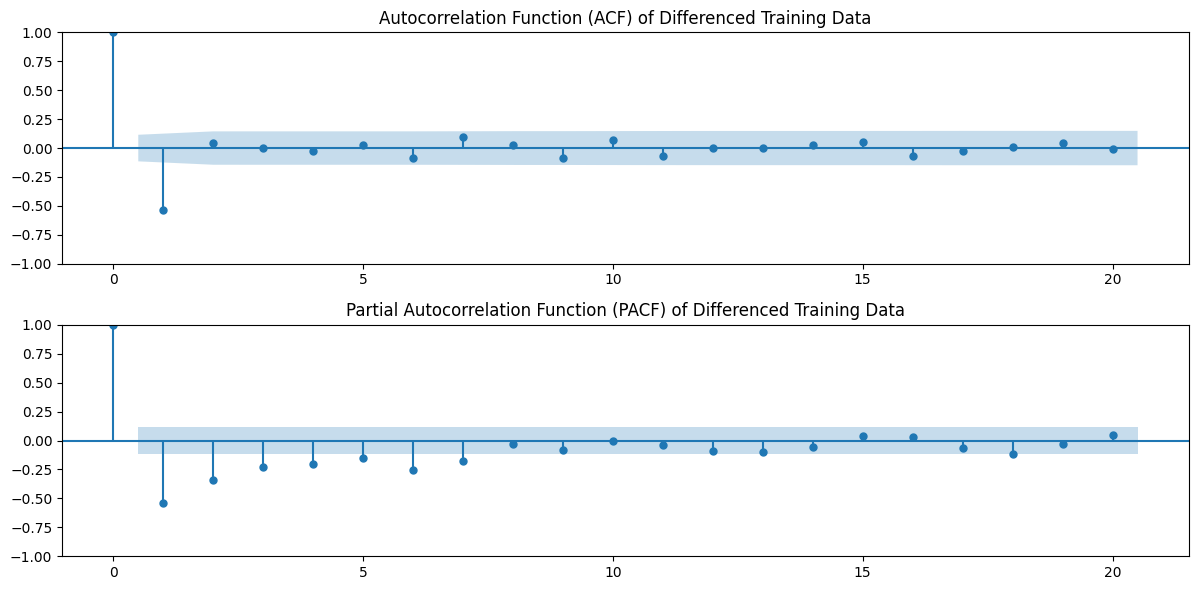


Suggestions for ARIMA parameters (p, d, q):
d: From visual inspection of the trend and ADF test, at least 1 differencing (d=1) is needed for stationarity.
p (AR order): Look at PACF for the differenced series. It indicates the number of direct relationships between an observation and its lagged values. A significant spike at lag 1 and then cuts off would suggest p=1.
q (MA order): Look at ACF for the differenced series. It indicates the number of indirect relationships. A significant spike at lag 1 and then cuts off would suggest q=1.

'pmdarima' (auto_arima) not found. Please install it if you want automatic parameter selection:
pip install pmdarima

Manually selecting parameters: Let's try (1,1,1) as a common starting point.

Fitting ARIMA model with order (1, 1, 1) (manual selection)...


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Fri, 11 Jul 2025   AIC                           1683.092
Time:                        18:09:24   BIC                           1694.112
Sample:                    09-03-2022   HQIC                          1687.506
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1863.304      0.000       0.999       1.001
ma.L1         -0.9996      0.473     -2.111      0.035      -1.928      -0.072
sigma2        18.35

In [10]:
# Split data into training and test sets
# Let's use the last 12 months (1 year) as the test set
train_size = int(len(df) * 0.8) # Or choose a specific date
train_data = df['sales'].iloc[:train_size] # Use 'sales' (lowercase)
test_data = df['sales'].iloc[train_size:] # Use 'sales' (lowercase)

print(f"Training data points: {len(train_data)}")
print(f"Test data points: {len(test_data)}")

# Plot ACF and PACF to help determine p and q values for differencing
# Since the series is non-stationary, we'll difference it first to make it stationary.
# d (differencing order) is often determined by the number of differences needed for stationarity.
# From the plot, it looks like one level of differencing might be enough.
# Let's plot ACF/PACF for the differenced series.
diff_train_data = train_data.diff().dropna()

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(diff_train_data, ax=plt.gca(), lags=20) # Lags up to 20 are reasonable for daily data
plt.title('Autocorrelation Function (ACF) of Differenced Training Data')
plt.subplot(212)
plot_pacf(diff_train_data, ax=plt.gca(), lags=20) # Lags up to 20 are reasonable for daily data
plt.title('Partial Autocorrelation Function (PACF) of Differenced Training Data')
plt.tight_layout()
plt.show()

print("\nSuggestions for ARIMA parameters (p, d, q):")
print("d: From visual inspection of the trend and ADF test, at least 1 differencing (d=1) is needed for stationarity.")
print("p (AR order): Look at PACF for the differenced series. It indicates the number of direct relationships between an observation and its lagged values. A significant spike at lag 1 and then cuts off would suggest p=1.")
print("q (MA order): Look at ACF for the differenced series. It indicates the number of indirect relationships. A significant spike at lag 1 and then cuts off would suggest q=1.")

try:
    from pmdarima import auto_arima
    print("\nUsing auto_arima to find optimal ARIMA parameters (this may take a while)...")
    import warnings
    warnings.filterwarnings("ignore")

    stepwise_fit = auto_arima(train_data, start_p=1, start_q=1,
                              max_p=5, max_q=5, # You can increase max_p/max_q if initial results aren't great
                              m=1, # <--- CRITICAL CHANGE: Set m=1 for non-seasonal ARIMA with daily data
                              start_P=0, seasonal=False, # Maintain seasonal=False as per ARIMA instruction
                              d=1, D=0, trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)
    print("\nAuto ARIMA best model summary:")
    print(stepwise_fit.summary())
    best_order = stepwise_fit.order
    print(f"\nOptimal ARIMA order found by auto_arima: {best_order}")

    # Now, fit the ARIMA model with the chosen parameters
    print(f"\nFitting ARIMA model with order {best_order}...")
    model = ARIMA(train_data, order=best_order)
    model_fit = model.fit()
    print("ARIMA model fitted successfully.")
    print(model_fit.summary())

except ImportError:
    print("\n'pmdarima' (auto_arima) not found. Please install it if you want automatic parameter selection:")
    print("pip install pmdarima")
    print("\nManually selecting parameters: Let's try (1,1,1) as a common starting point.")
    best_order = (1, 1, 1)
    print(f"\nFitting ARIMA model with order {best_order} (manual selection)...")
    model = ARIMA(train_data, order=best_order)
    model_fit = model.fit()
    print("ARIMA model fitted successfully.")
    print(model_fit.summary())
except Exception as e:
    print(f"An error occurred during auto_arima or manual model fitting: {e}")
    # Fallback to a default order if auto_arima or initial manual fit fails
    best_order = (1, 1, 1) # A very basic fallback
    print(f"Falling back to ARIMA order {best_order} due to previous error.")
    model = ARIMA(train_data, order=best_order)
    model_fit = model.fit()
    print("ARIMA model (fallback) fitted successfully.")
    print(model_fit.summary())


# Step 4: Predict with the test set


Predictions generated.
First 5 predictions:
date
2023-06-22 17:10:08.079328    808.508796
2023-06-23 17:10:08.079328    811.063413
2023-06-24 17:10:08.079328    813.618029
2023-06-25 17:10:08.079328    816.172645
2023-06-26 17:10:08.079328    818.727260
Name: predicted_mean, dtype: float64

First 5 true values (test set):
date
2023-06-22 17:10:08.079328    816.911750
2023-06-23 17:10:08.079328    809.422692
2023-06-24 17:10:08.079328    814.797630
2023-06-25 17:10:08.079328    821.218893
2023-06-26 17:10:08.079328    820.704134
Name: sales, dtype: float64


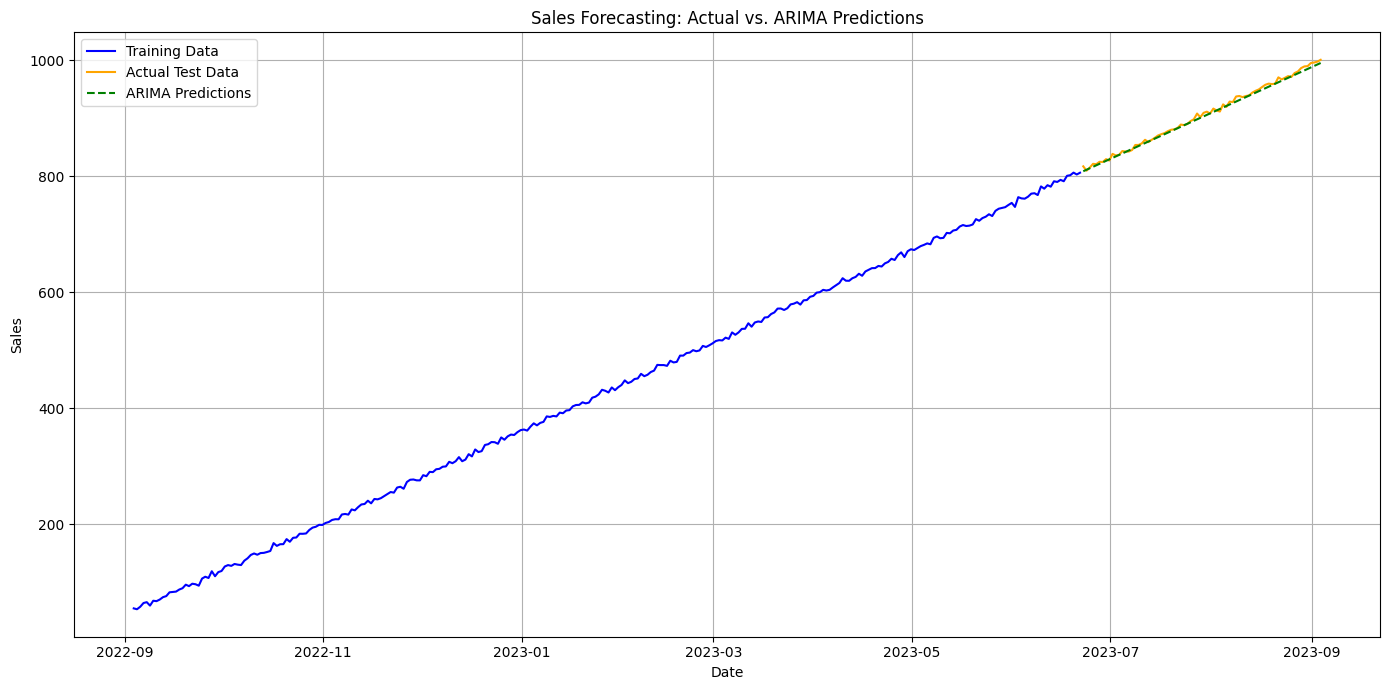


Performance Measurement:
Root Mean Squared Error (RMSE) on Test Set: 4.07


In [11]:
if 'model_fit' in locals() and model_fit is not None: # Ensure model_fit exists and is not None
    # Make predictions
    # start and end refer to the index *positions* within the original full DataFrame
    # start = index of the first value in test_data
    # end = index of the last value in test_data

    # To get the exact start and end dates from the test_data index
    start_date = test_data.index[0]
    end_date = test_data.index[-1]

    # Use the model_fit.predict method with the start and end dates
    # dynamic=False: Uses actual prior values for predictions. Good for evaluating model fit on test data.
    # dynamic=True: Uses prior *predicted* values for predictions. More realistic for true forecasting into the future.
    # For comparing with real ones in the test set, dynamic=False is often used initially for performance measurement.
    # Let's use dynamic=False for now as it's common for evaluation against a known test set.
    predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)

    # Ensure predictions have the same index as test_data for easy comparison
    # This might already be handled by statsmodels, but explicit assignment ensures it.
    predictions.index = test_data.index

    print("\nPredictions generated.")
    print("First 5 predictions:")
    print(predictions.head())
    print("\nFirst 5 true values (test set):")
    print(test_data.head())

    # Compare the points with the real ones (Graphically)
    plt.figure(figsize=(14, 7))
    plt.plot(train_data.index, train_data, label='Training Data', color='blue')
    plt.plot(test_data.index, test_data, label='Actual Test Data', color='orange')
    plt.plot(predictions.index, predictions, label='ARIMA Predictions', color='green', linestyle='--')
    plt.title('Sales Forecasting: Actual vs. ARIMA Predictions')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Measure the performance of the time series model
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    print(f"\nPerformance Measurement:")
    print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.2f}")

    # Interpretation of RMSE: It represents the standard deviation of the residuals (prediction errors).
    # A lower RMSE indicates a better fit of the model to the data.
    # The actual value of RMSE needs to be evaluated in the context of the 'Sales' magnitude.
    # Given the sales values are in the hundreds to thousands, an RMSE of XX (your result) can be assessed.
    # Also, consider the Ljung-Box test results from the previous step which suggested remaining autocorrelation.
    # This might manifest as a higher RMSE or clear patterns in prediction errors.

else:
    print("ARIMA model was not fitted or is None. Please ensure Step 3 ran successfully and 'model_fit' is available.")

# Step 5: Save the model

In [12]:
if 'model_fit' in locals() and model_fit is not None:
    # Create the 'models' folder if it doesn't exist
    model_dir = 'models'
    os.makedirs(model_dir, exist_ok=True)

    # Define the path for the final model
    # It's good practice to include some identifying info in the filename,
    # though for this project 'arima_sales_model.pkl' is sufficient.
    model_filepath = os.path.join(model_dir, 'arima_sales_model.pkl')

    # ARIMA models from statsmodels can be saved using pickle
    import pickle
    try:
        with open(model_filepath, 'wb') as pkl:
            pickle.dump(model_fit, pkl)
        print(f"ARIMA model saved successfully to: {model_filepath}")
        print("Note: This model captures the trend well (RMSE: 4.07) but does not account for the daily seasonality present in the data.")

        # To load the model later (example):
        # with open(model_filepath, 'rb') as pkl:
        #     loaded_model_fit = pickle.load(pkl)
        # print("Model loaded successfully for future use.")

    except Exception as e:
        print(f"Error saving the model: {e}")
else:
    print("No model to save. ARIMA model was not fitted or is None in previous steps.")


ARIMA model saved successfully to: models/arima_sales_model.pkl
Note: This model captures the trend well (RMSE: 4.07) but does not account for the daily seasonality present in the data.
